In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import *
from pyecharts.faker import Faker
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载
df = pd.read_csv('./Downloads/df_short.csv')


In [2]:
df

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date
0,155942,1174854,344088,1,Huawei,Phone,Electronics,2018-03-07
1,162254,455341,130092,1,Other,Coat,Clothes,2018-03-23
2,176833,478893,131477,1,Gree,Air Conditioner,Household Eletric Appliance,2018-03-18
3,151802,95399,310506,1,Apple,Phone,Electronics,2018-03-30
4,57802,746439,296528,1,illuma,Milk Power,Mother and Infant,2018-02-26
...,...,...,...,...,...,...,...,...
55143,21800,907477,253192,1,Haier,Washing Machine,Household Eletric Appliance,2018-03-16
55144,65108,818997,37177,1,Chow Tai Fook,Necklace,Jewellery Accessories,2018-03-23
55145,69754,771488,206886,1,Other,Eye Shadow,Beauty Makeup,2018-03-20
55146,176019,739636,104908,1,Lipton,Tea,Food,2018-03-24


（1）在电商平台中，最受消费者喜爱的商品大类的分布

In [3]:
df.info()#对源文件进行查看是否有缺失值，且需要注意的是date的时间类型后面需要进行转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55148 entries, 0 to 55147
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     55148 non-null  int64 
 1   customer_id    55148 non-null  int64 
 2   product_id     55148 non-null  int64 
 3   type           55148 non-null  int64 
 4   brand          55148 non-null  object
 5   category       55148 non-null  object
 6   shop_category  55148 non-null  object
 7   date           55148 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.4+ MB


In [4]:
df[df.duplicated()].count() #发现表中没有重复的数据

Unnamed: 0       0
customer_id      0
product_id       0
type             0
brand            0
category         0
shop_category    0
date             0
dtype: int64

In [5]:
date= df['shop_category'].value_counts()#最受消费者喜爱的商品大类的分布
date

Electronics                    21745
Clothes                         9106
Beauty Makeup                   8837
Food                            7473
Household Eletric Appliance     3076
Furniture                       1746
Jewellery Accessories           1560
Outdoor Sports                  1184
Mother and Infant                421
Name: shop_category, dtype: int64

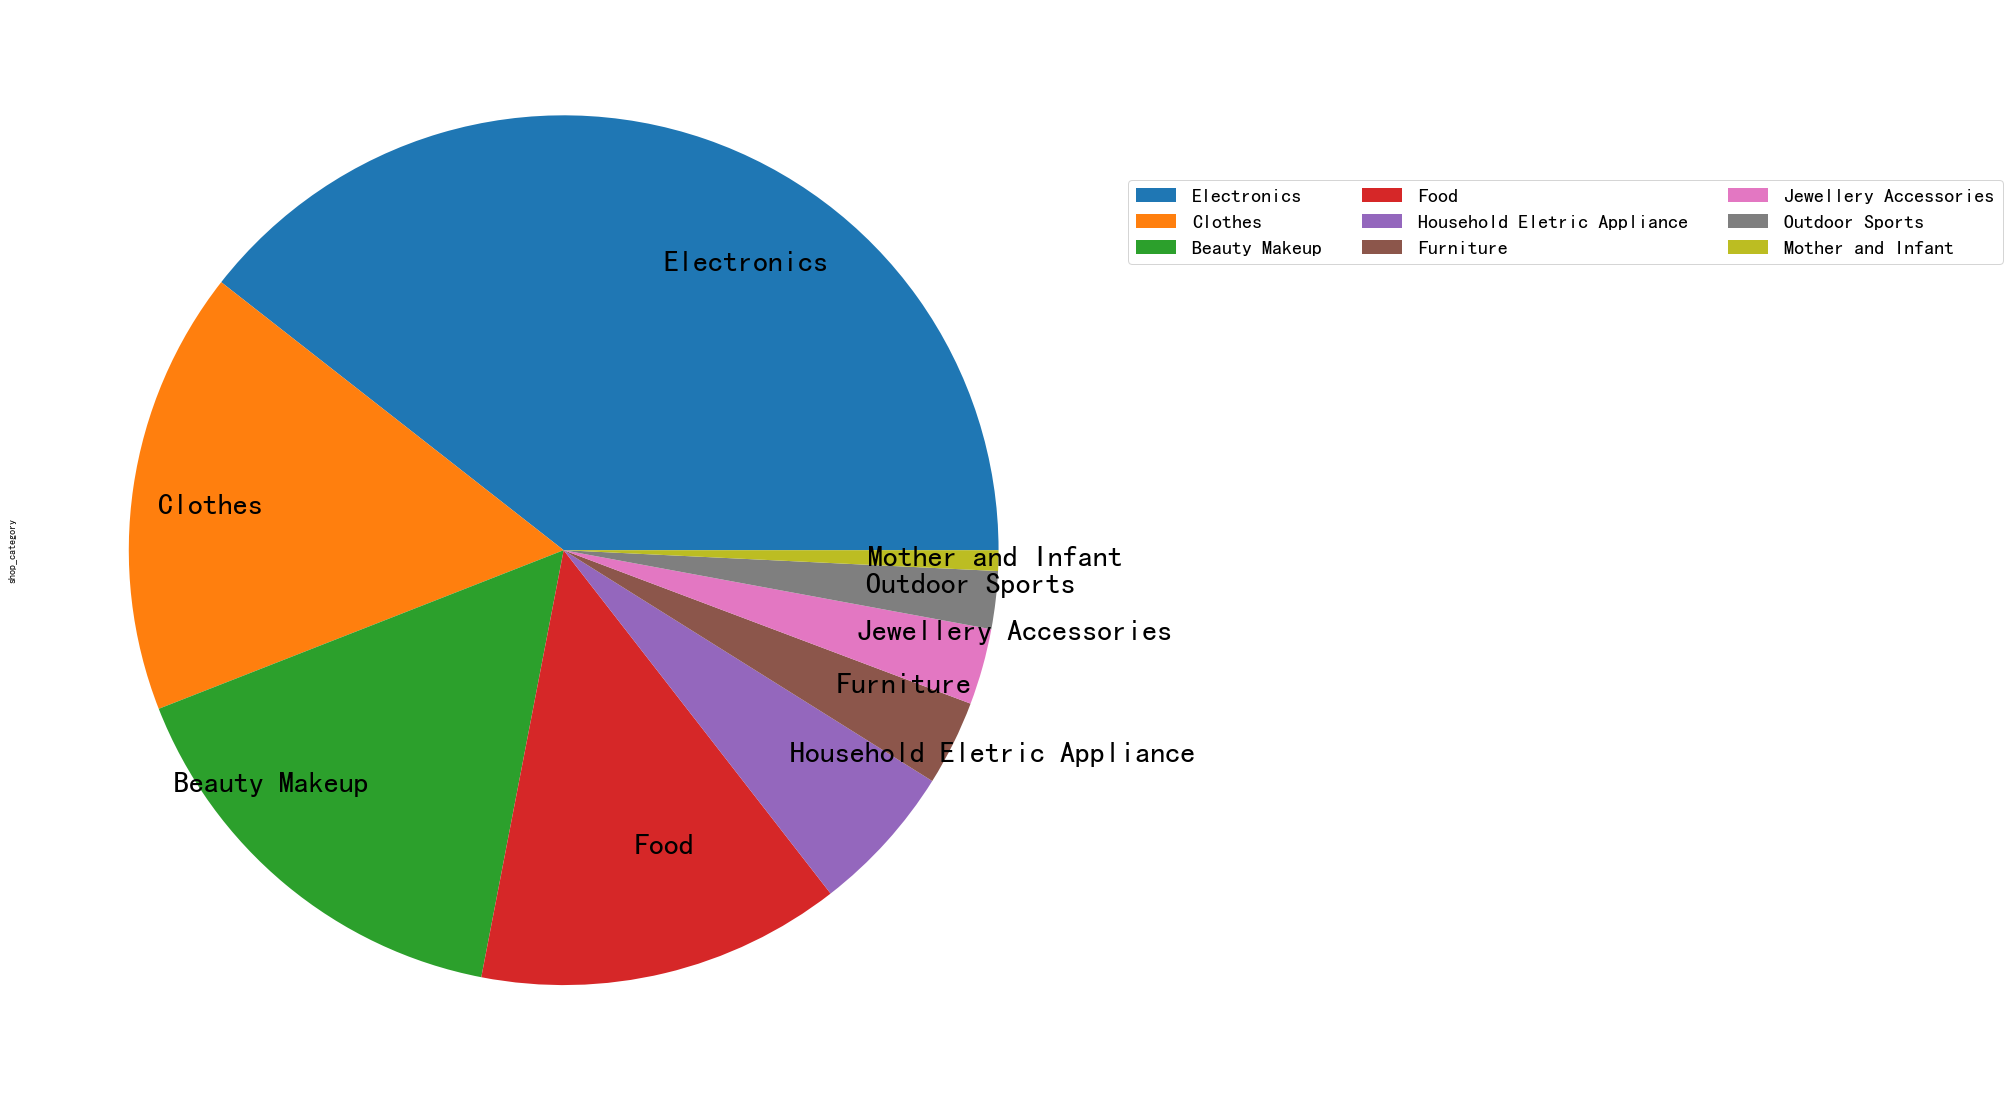

In [6]:
plt.figure(figsize=[20,20])
date.plot.pie(labeldistance = 0.7,textprops= {'fontsize' : 30})#数据可视化
plt.rcParams.update({'font.size': 20}) #设置图例字体大小
plt.legend(bbox_to_anchor=(1.01,0.85),ncol = 3)#显示图例

（2）针对最受喜欢的特定大类，其细分品类的分布
由上题可知最受喜欢的特定大类是Electronics 

In [7]:
detail=  df['shop_category'] ==  'Electronics'#在shop_category为Electronics的情况下研究其细分品类的分布
detail_count = df.loc[detail]['category'].value_counts()#将detail作为行索引来查找其细分品类的分布
detail_count

Phone             14762
Notebook           2444
Tablet             2019
Digital Camera     1665
Xbox                834
Ipad                 21
Name: category, dtype: int64

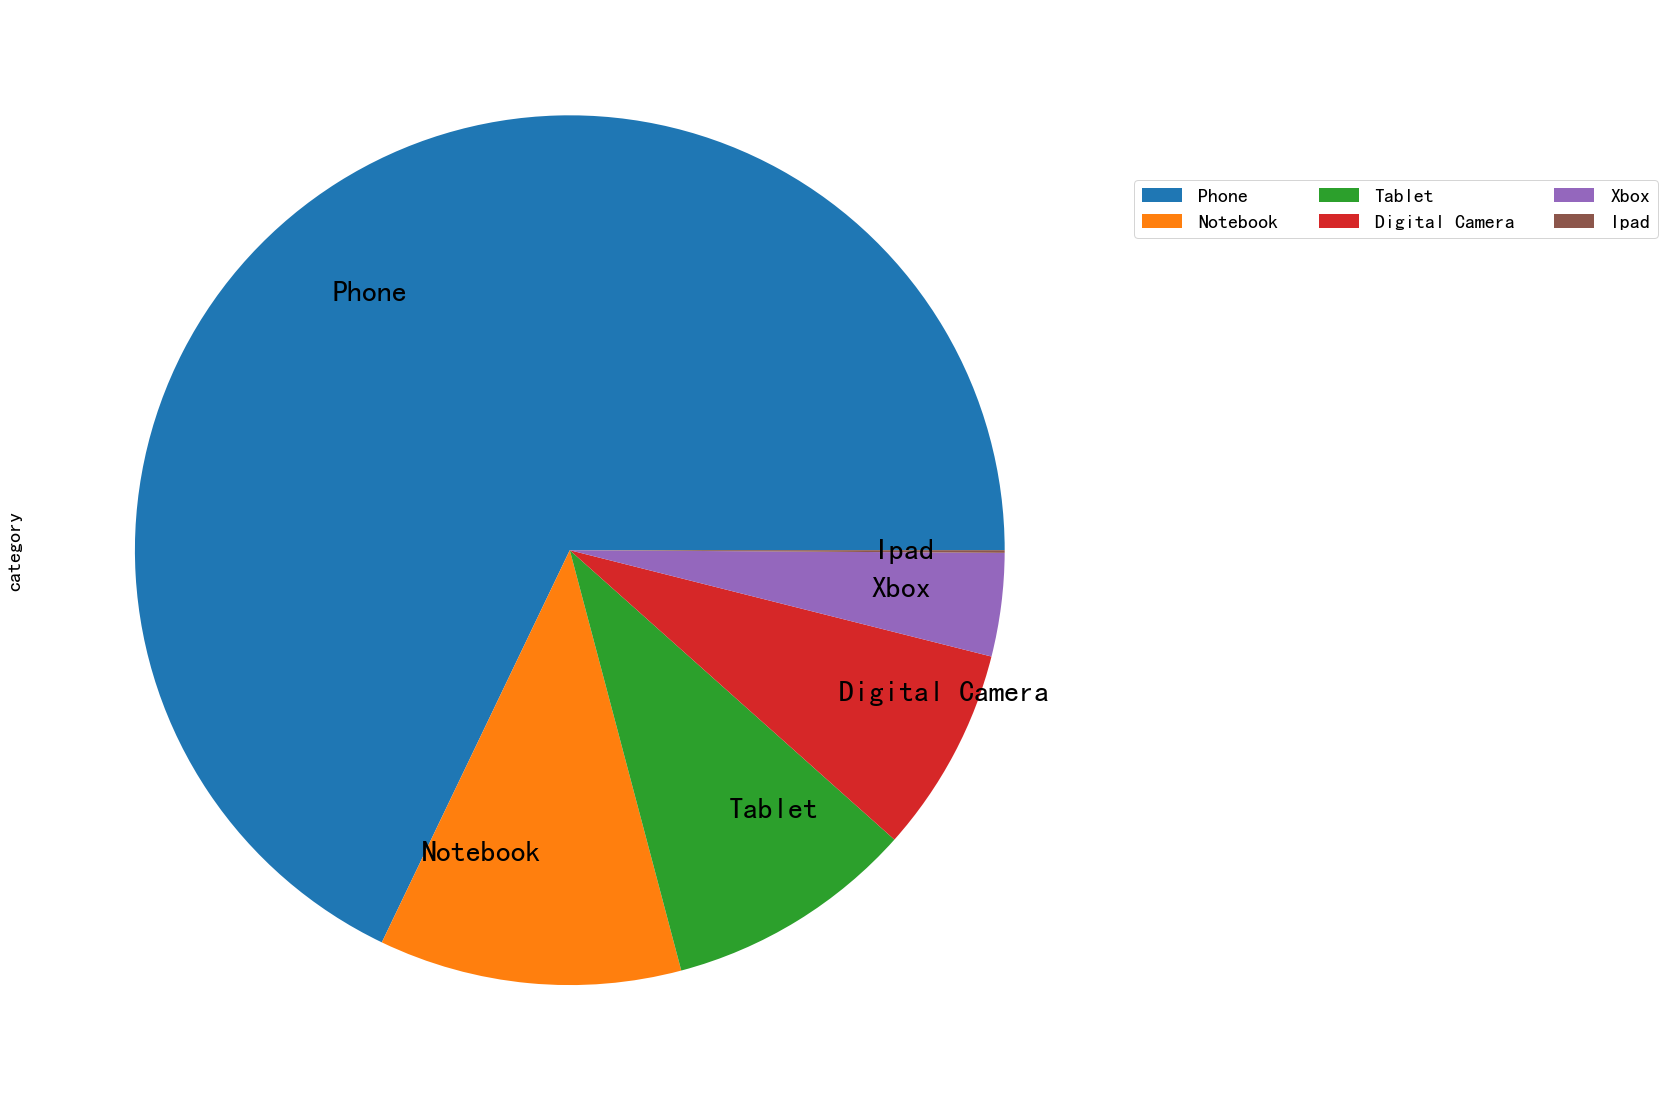

In [8]:
plt.figure(figsize=[20,20])
detail_count.plot.pie(labeldistance = 0.7,textprops= {'fontsize' : 30})#数据可视化
plt.rcParams.update({'font.size': 20}) #设置图例字体大小
plt.legend(bbox_to_anchor=(1.01,0.85),ncol = 3)#显示图例

（3）针对某些细分品类，最受消费者喜爱的品牌有哪些，销售量最高的是哪个？

       这里我们对手机这一细分品类进行分析

In [9]:
detail_phone_date =df.query('category == "Phone" and shop_category == "Electronics"')#使用pands库的query查询函数进行多索引查询
detail_phone_date.brand.unique()#查看手机这一细分品类的品牌个数

array(['Huawei', 'Apple', 'Other', 'Sumsung', 'Vivo', 'Redmi', 'OPPO'],
      dtype=object)

In [10]:
brand_date = detail_phone_date.brand.value_counts()
brand_date

Huawei     5038
Apple      4471
Other      1756
Sumsung    1512
Redmi       874
Vivo        836
OPPO        275
Name: brand, dtype: int64

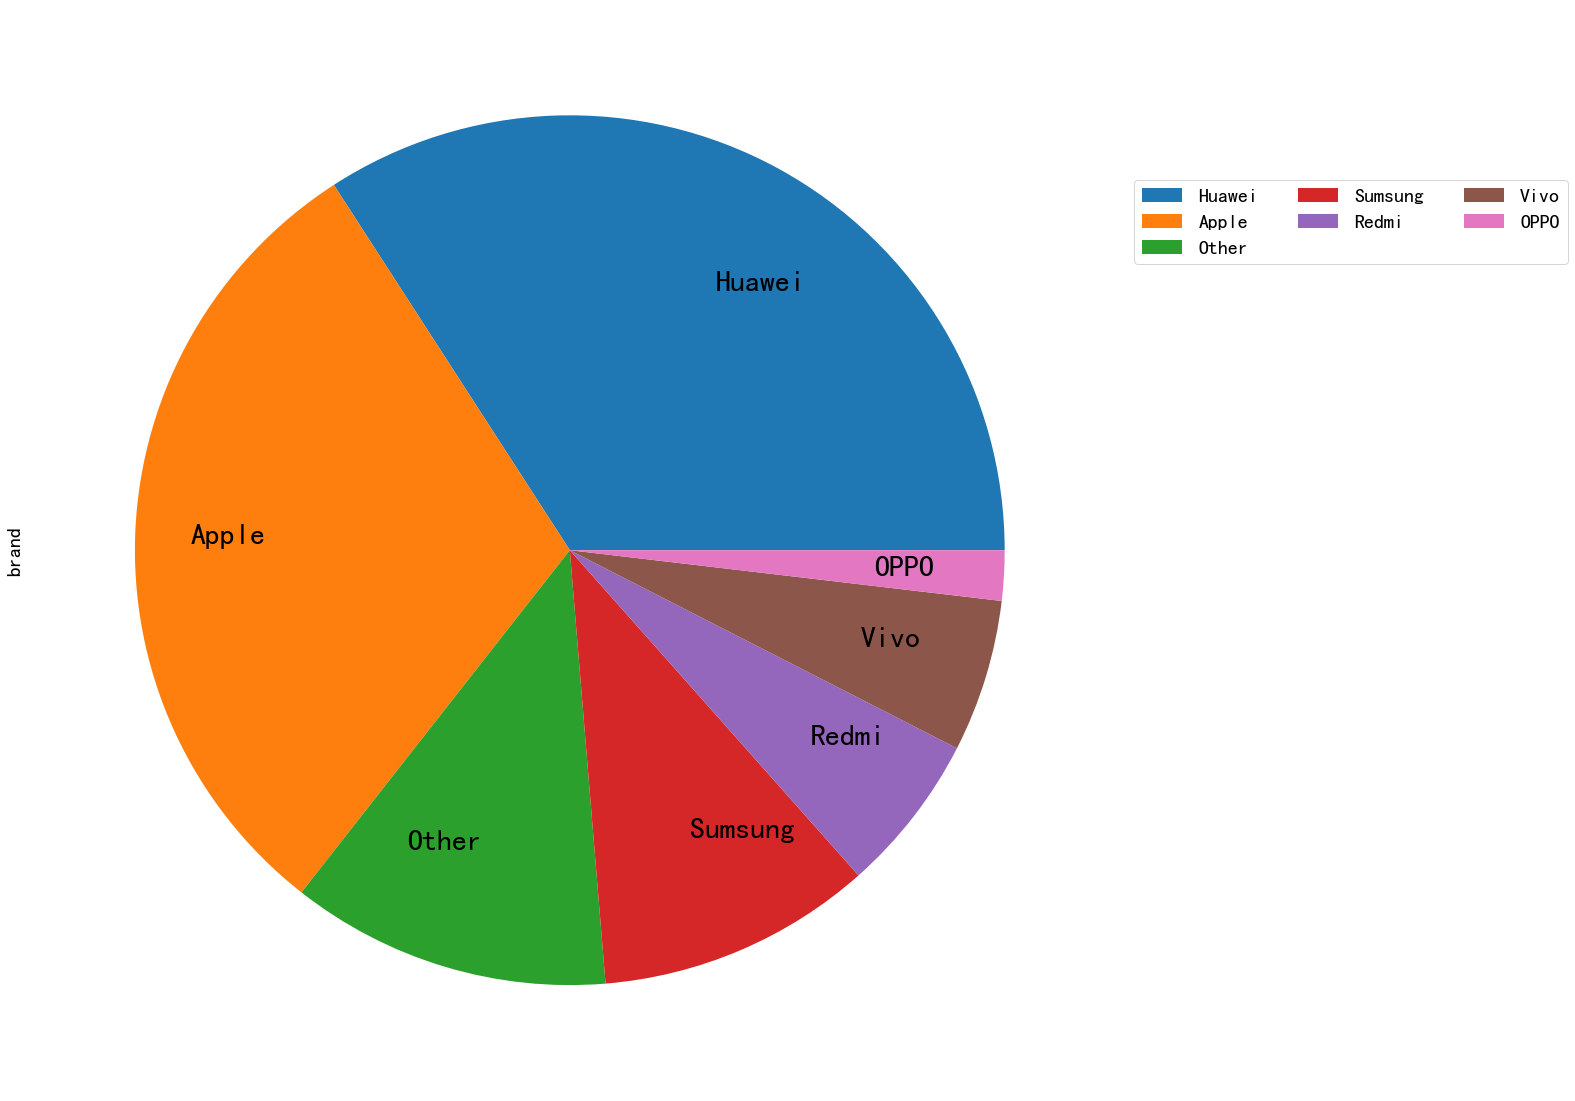

In [11]:
plt.figure(figsize=[20,20])
brand_date.plot.pie(labeldistance = 0.7,textprops= {'fontsize' : 30})#数据可视化
plt.rcParams.update({'font.size': 20}) #设置图例字体大小
plt.legend(bbox_to_anchor=(1.01,0.85),ncol = 3)#显示图例

    其它的品类和上述的分析过程类似

（4）针对不同的日期，总体订单数的数量是怎么样的？变化是怎么样的？
    之前我们观察到df_short.csv这一数据中date这一列的数据是object类型也就是字符串类型，是无法进行直接比较的所以我们需要先对date进行类型转换

In [12]:
df['date'] = pd.to_datetime(df['date'],format ='%Y-%m-%d')#注意与原数据的格式要保持一致
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55148 entries, 0 to 55147
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     55148 non-null  int64         
 1   customer_id    55148 non-null  int64         
 2   product_id     55148 non-null  int64         
 3   type           55148 non-null  int64         
 4   brand          55148 non-null  object        
 5   category       55148 non-null  object        
 6   shop_category  55148 non-null  object        
 7   date           55148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.4+ MB


In [13]:
order_date = df.date.value_counts()
dates = np.array(order_date.keys().astype(str))#将时间取出
order_date

2018-02-06    1274
2018-02-04    1264
2018-02-05    1189
2018-02-01    1175
2018-02-03    1151
              ... 
2018-02-17     408
2018-02-16     378
2018-02-15     316
2018-03-28      83
2018-03-27      73
Name: date, Length: 74, dtype: int64

Text(0, 0.5, '销量')

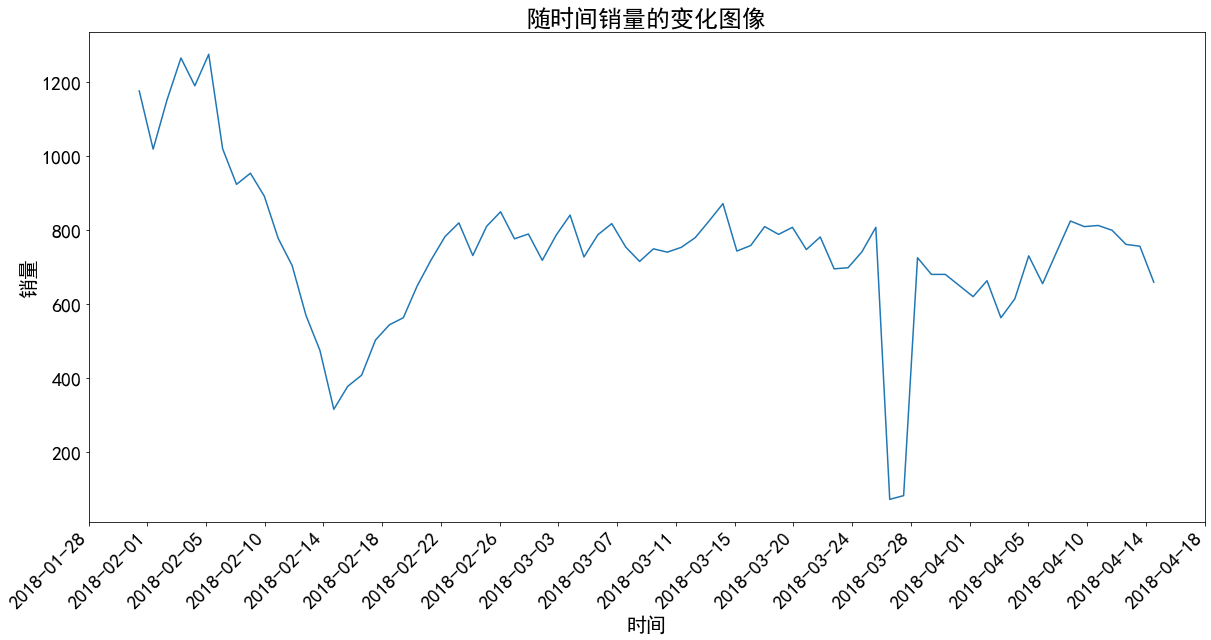

In [14]:
#数据可视化
plt.figure(figsize=[20,10])
order_date.plot()#对上面的数据进行数据可视化
plt.title("随时间销量的变化图像")
ax = plt.gca()#获取的是x轴上面的坐标
xlocator = mpl.ticker.LinearLocator(20)#将x轴上面的坐标显示为20个
ax.xaxis.set_major_locator(xlocator)#应用到原图上
plt.xticks(rotation = 45)#将x轴上面的坐标字体扭转45度利于辨认
plt.xlabel("时间")
plt.ylabel("销量")

在2018-02-05之后人们的购买数量持续下降一直到2018-02-18日后人们购买数量回升后趋于平稳，但是在2018-03-26日销量有一个断崖式的下降

（5）当从冬季跨越到春季之后（换季期间），衣服的购买数量是否会会远超其他的大类（什么比衣服还要重要？）

In [15]:
df.shop_category.unique()#取出shop_category的所有的品类

array(['Electronics', 'Clothes', 'Household Eletric Appliance',
       'Mother and Infant', 'Food', 'Beauty Makeup', 'Outdoor Sports',
       'Furniture', 'Jewellery Accessories'], dtype=object)

In [16]:
clothes_date_order_numsLine = Line()
clothes_date_order_numsLine.add_xaxis(dates)#将时间作为x轴的值
clothes_date_order_numsLine.set_global_opts(
        title_opts=opts.TitleOpts(title="不同大品类的商品每天的订单数量",subtitle='2018/02/01-2018/04/15'),#标题
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category"),#x轴是类目轴
        yaxis_opts=opts.AxisOpts(
            type_="value",#y轴是数值轴
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        legend_opts=opts.LegendOpts(type_="plain",is_show=True,orient="vertical",pos_left='right'))#设置图例的位置
for i in list(df.shop_category.unique()):#将列表中的所有值全部取出
    clothes_date_order_numsLine.add_yaxis(i,df[df['shop_category'] == i].date.value_counts().sort_index().values.tolist(),is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False))#将列表中相应的元素取出并将其作为索引统计其数量
    
clothes_date_order_numsLine.render_notebook() #图表渲染在电脑屏幕上

在换季期间衣服品类的购买量确实会有一定的的增长但是并不是远超于其他的品类的，其少于Electronics这一品类的销量，而且在换季之后FOOD 和 Beauty Makeup慢慢追上了衣服品类的销量

（6）针对手机行业，不同日期中各大品牌的销量变化是怎么样的

In [17]:
detail_phone_date =df.query('category == "Phone" and shop_category == "Electronics"')
detail_phone_date

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date
0,155942,1174854,344088,1,Huawei,Phone,Electronics,2018-03-07
3,151802,95399,310506,1,Apple,Phone,Electronics,2018-03-30
6,99280,1080218,358237,1,Other,Phone,Electronics,2018-03-20
7,168601,936385,313236,1,Sumsung,Phone,Electronics,2018-04-15
9,181212,859015,31583,1,Huawei,Phone,Electronics,2018-02-26
...,...,...,...,...,...,...,...,...
55121,85090,501811,313236,1,Sumsung,Phone,Electronics,2018-02-23
55126,55200,1306466,38129,1,Huawei,Phone,Electronics,2018-04-03
55130,105457,366500,286812,1,Other,Phone,Electronics,2018-03-26
55134,103616,1041042,115838,1,Huawei,Phone,Electronics,2018-02-06


In [18]:
detail_phone_date.brand.unique()

array(['Huawei', 'Apple', 'Other', 'Sumsung', 'Vivo', 'Redmi', 'OPPO'],
      dtype=object)

In [19]:
phone_date_order_numsLine = Line()
phone_date_order_numsLine.add_xaxis(dates)#将时间作为x轴的值
phone_date_order_numsLine.set_global_opts(title_opts=opts.TitleOpts(title="不同品牌的手机每天的销售情况",subtitle='2018/02/01-2018/04/15'),
    tooltip_opts=opts.TooltipOpts(is_show=True),  
    xaxis_opts=opts.AxisOpts(type_='category'),#x轴是类目轴
    yaxis_opts=opts.AxisOpts(
        type_="value",#y轴是数值轴
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
    legend_opts=opts.LegendOpts(type_="plain",is_show=True,orient="vertical",pos_left='right'))
for i in list(detail_phone_date.brand.unique()):
    phone_date_order_numsLine.add_yaxis(i,detail_phone_date[detail_phone_date['brand'] == i].date.value_counts().sort_index().values.tolist(),is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False))
phone_date_order_numsLine.render_notebook() 

华为和苹果这两个品牌的销量相较于其他手机品牌的销量更多，三星这一品牌的销量波动较大，而其他的品牌销售数量相差较小

type列到底是什么，它影响了什么？是否可以根据通用商品大类来预测用户性别、或者给予一定推荐list？
    首先我认为type指的是用户购买行为，分别是浏览，下单，关注，评论，加购物车，它影响了用户实际上的购买行为，可以通过通用商品大类来预测用户性别或者给予一定的推荐list例如像Beauty Makeup这一大类产品女性的消费数量是远远超过男性的消费数量的。

针对第二个文件JD_labels：通过日常操作收集到的用户偏好数据
（1）用户购买最多的商品是什么？用户会愿意重复购买的商品有哪些？

In [20]:
JD_labels = pd.read_csv('./Downloads/JD_labels.csv')
JD_labels

,Unnamed: 0,customer_id,time_browse,time_Order,cate_most_browse,cate_most_Follow,cate_most_SavedCart,cate_most_Order,month_buy,month_Cart,...,week_buy,week_Cart,week_active,last_browse,last_SavedCart,last_Order,interval_buy,browse_not_buy,cart_not_buy,buy_again
0,0,1174854,上午,NaN,Phone,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.0,NaN,NaN,NaN,是,是,未购买
1,1,455341,下午,NaN,Coat,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,23.0,NaN,NaN,NaN,是,是,未购买
2,2,478893,上午,NaN,Air Conditioner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,28.0,NaN,NaN,NaN,是,是,未购买
3,3,95399,晚上,NaN,Phone,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,16.0,NaN,NaN,NaN,是,是,未购买
4,4,746439,晚上,NaN,Milk Power,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48.0,NaN,NaN,NaN,是,是,未购买
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48998,48998,907477,下午,NaN,Washing Machine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,30.0,NaN,NaN,NaN,是,是,未购买
48999,48999,818997,上午,NaN,Necklace,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,23.0,NaN,NaN,NaN,是,是,未购买
49000,49000,771488,上午,NaN,Eye Shadow,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,26.0,NaN,NaN,NaN,是,是,未购买
49001,49001,739636,上午,NaN,Tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,22.0,NaN,NaN,NaN,是,是,未购买


In [21]:
JD_labels.time_Order.isnull() == False#下单时间不等于空那么就是下单了
actual_buy = JD_labels[JD_labels.time_Order.isnull() == False]#将上面的下单时间作为索引查询出用户购买的详细信息
actual_buy_date = actual_buy.cate_most_Order.value_counts()
actual_buy_date

Coat                          374
Tea                           352
Necklace                      185
Face Cream                    155
Facial Essence                153
Foundation Make-up            137
Bracelet                      106
Candy                          86
Induction Cooker               80
Perfume                        80
Milk                           78
Cookie                         78
Washing Machine                75
Milk Power                     74
Lipstick                       74
Air Conditioner                74
Facial Moisturizer             70
Television                     66
Refrigerator                   63
Makerup Water                  63
Sofa                           59
Bed                            57
Football                       55
Sunscreen Cream                55
Coffee                         53
Light                          52
Eye Shadow                     45
Facial Mask                    43
Badminton                      40
Rice Cooker   

<AxesSubplot:>

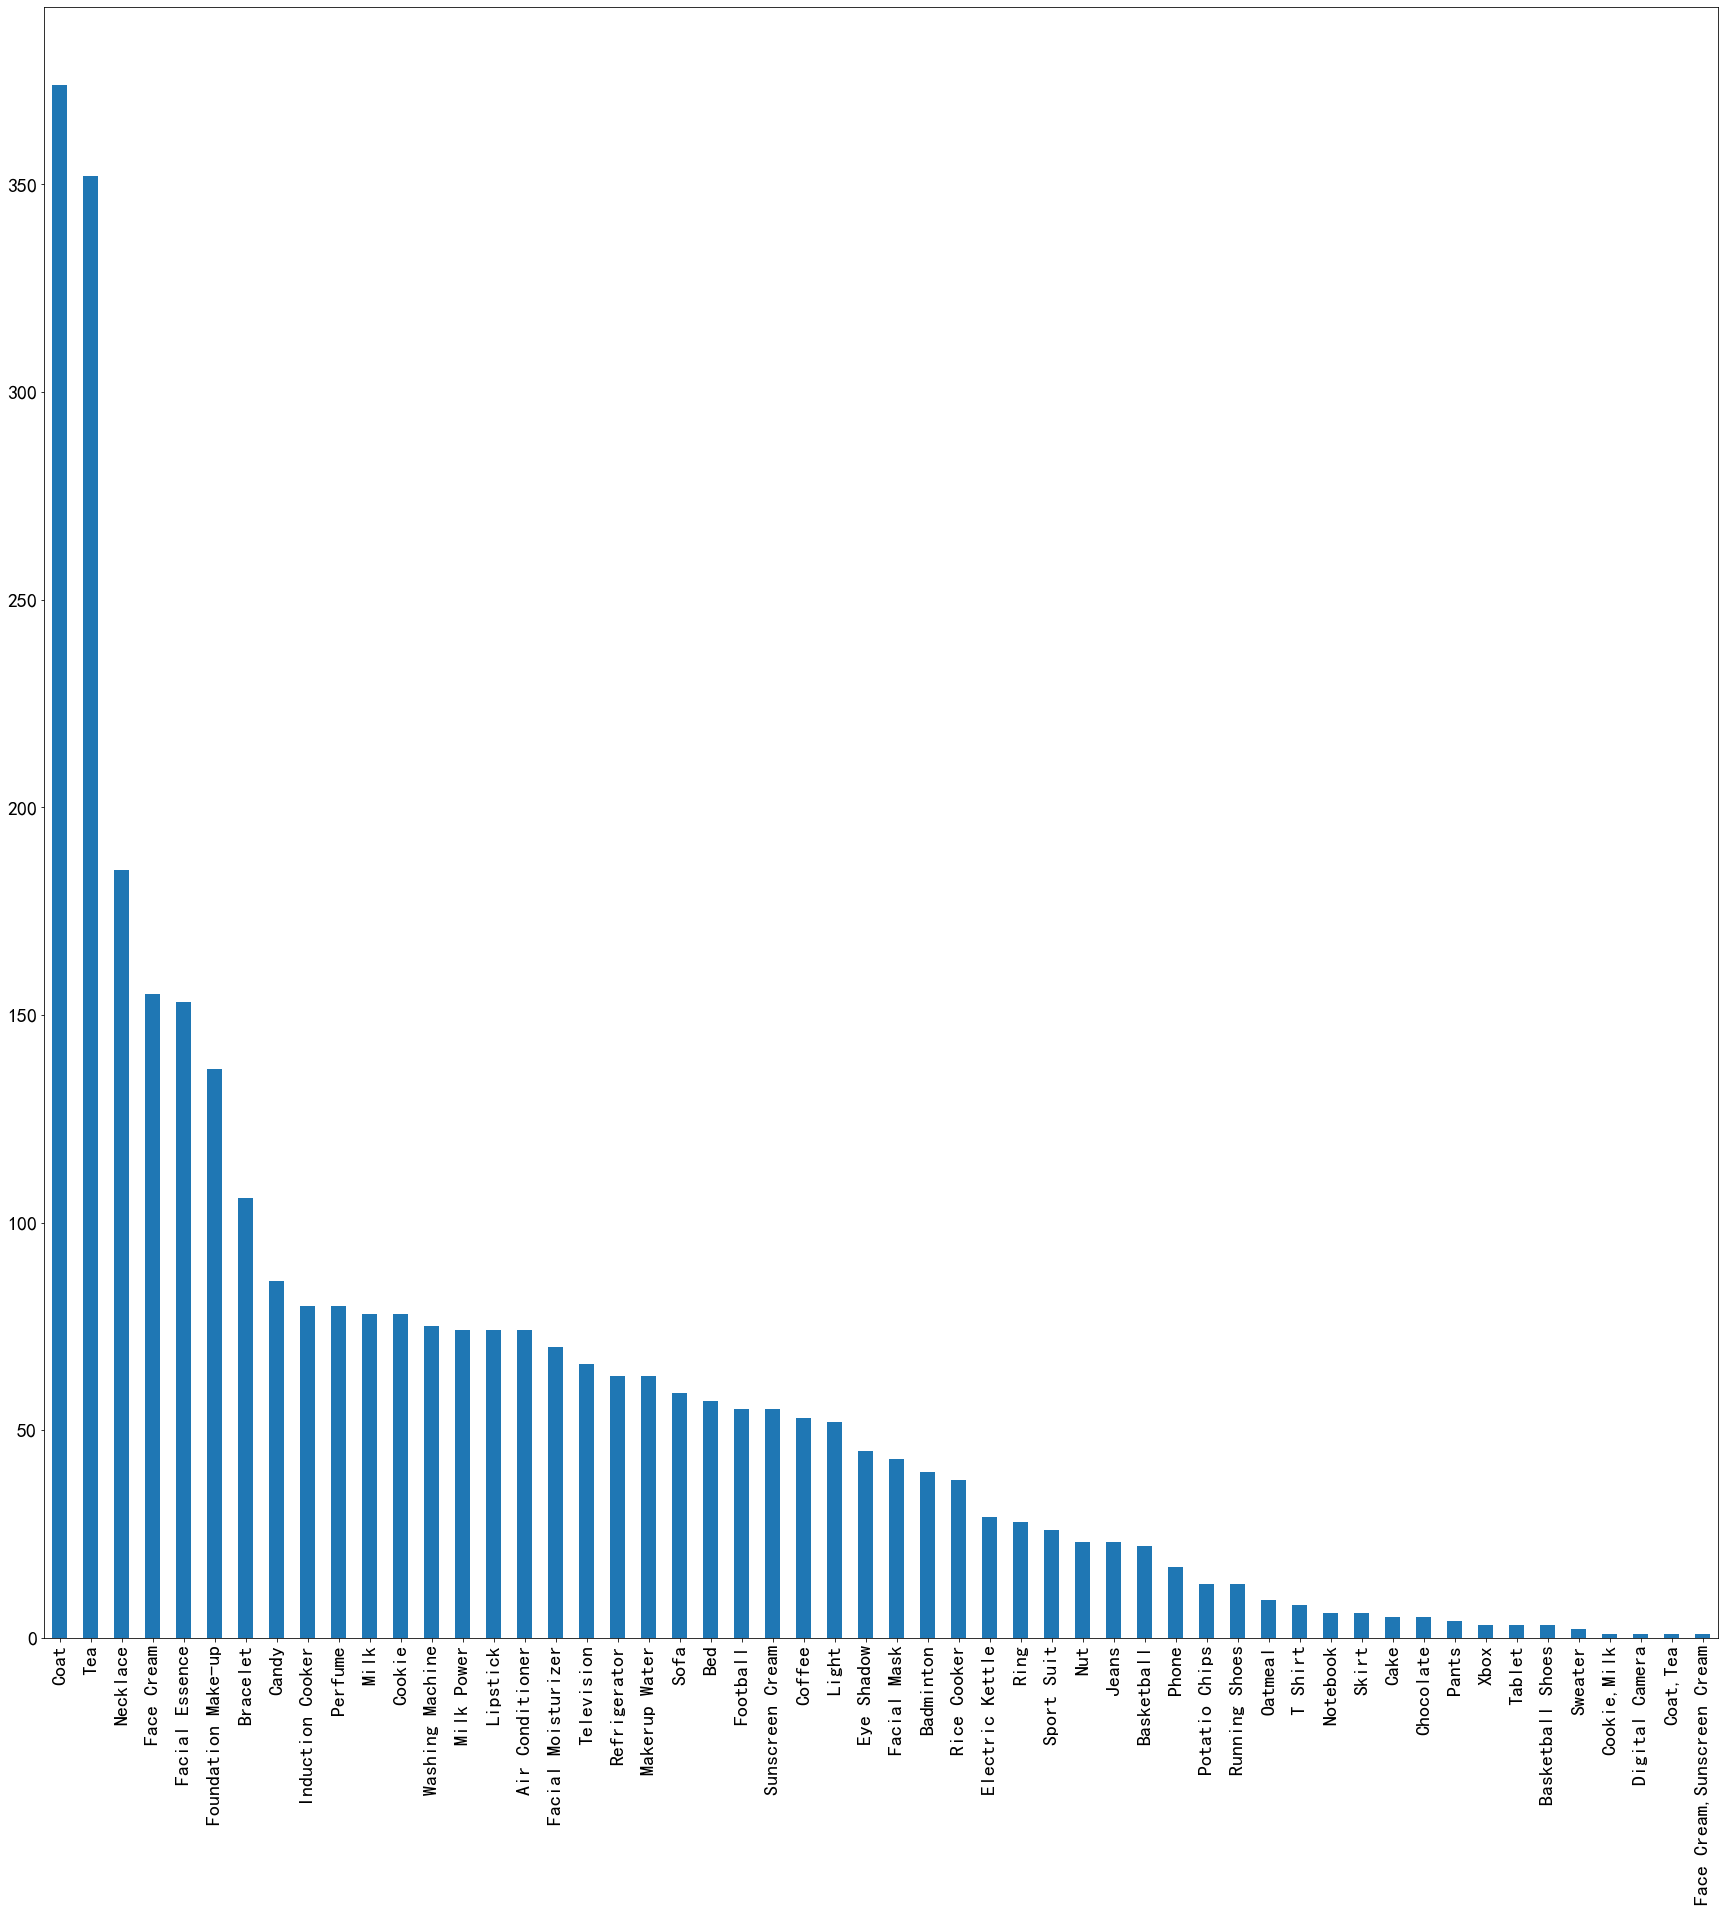

In [22]:
plt.figure(figsize=[30,30])
actual_buy_date.plot.bar()


In [23]:
JD_labels.buy_again == "是"
buy_again_date = JD_labels[JD_labels.buy_again == "是"]
buy_again_counts = buy_again_date.cate_most_Order.value_counts()
buy_again_counts

Tea                           1
Face Cream                    1
Face Cream,Sunscreen Cream    1
Basketball                    1
Necklace                      1
Facial Essence                1
Coat,Tea                      1
Cookie,Milk                   1
Name: cate_most_Order, dtype: int64

<AxesSubplot:>

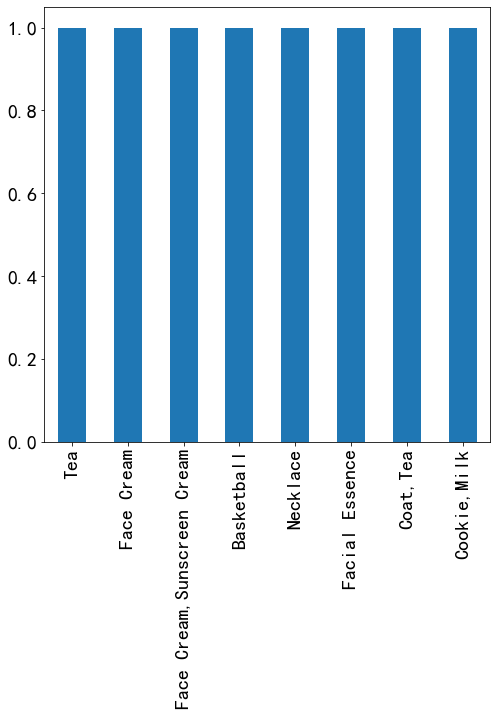

In [24]:
plt.figure(figsize=[8,8])
buy_again_counts.plot.bar()

（2）用户浏览最多、收藏最多和添加到购物车最频繁的商品是什么？

In [25]:
#用户浏览最多的商品
cate_most_browse_counts = JD_labels.cate_most_browse.value_counts().head(10)#由于数据实在太多这里只去前十个
cate_most_browse_counts

Phone                 11749
Coat                   5888
Tea                    2111
Notebook               1925
Tablet                 1675
Face Cream             1273
Digital Camera         1211
Foundation Make-up     1053
Facial Essence         1020
Candy                   871
Name: cate_most_browse, dtype: int64

<AxesSubplot:>

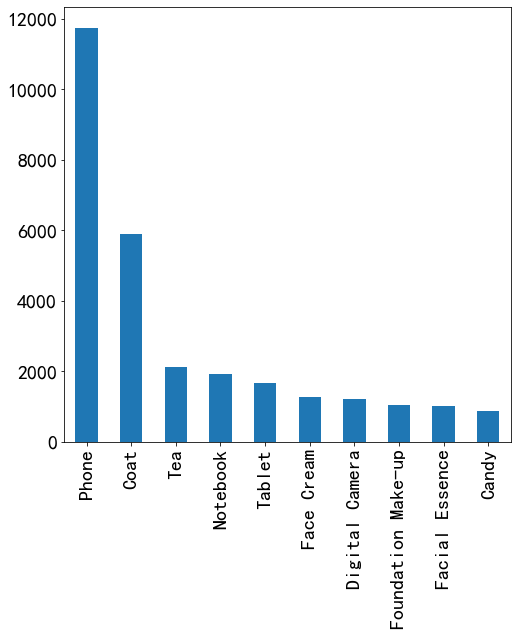

In [26]:
#可视化
plt.figure(figsize=[8,8])
cate_most_browse_counts.plot.bar()

In [27]:
#用户收藏最多的商品
cate_most_Follow_counts = JD_labels.cate_most_Follow.value_counts().head(10)
cate_most_Follow_counts


Phone            159
Coat              82
Tea               57
Milk              27
Notebook          24
Makerup Water     20
Candy             20
Cookie            19
Bed               16
Face Cream        15
Name: cate_most_Follow, dtype: int64

<AxesSubplot:>

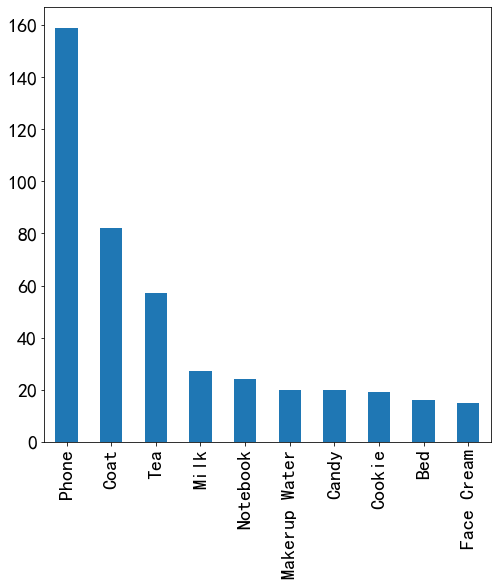

In [28]:
#可视化
plt.figure(figsize=[8,8])
cate_most_Follow_counts.plot.bar()

In [29]:
#用户添加到购物车最频繁的商品
cate_most_SavedCart_counts = JD_labels.cate_most_SavedCart.value_counts().head(10)
cate_most_SavedCart_counts

Phone             221
Tea                76
Coat               67
Tablet             62
Notebook           50
Necklace           28
Facial Essence     26
Candy              24
Digital Camera     20
Face Cream         20
Name: cate_most_SavedCart, dtype: int64

<AxesSubplot:>

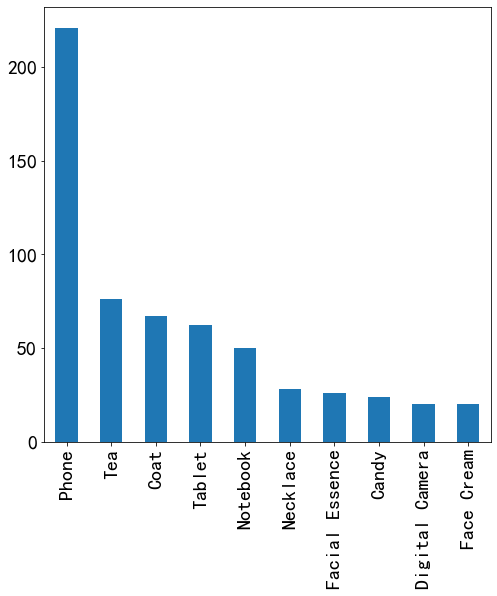

In [30]:
plt.figure(figsize=[8,8])
cate_most_SavedCart_counts.plot.bar()

（3）用户浏览最多和添加到了购物车最多，但是没有购买的商品是什么？

In [31]:
browse_not_buy_index = JD_labels.browse_not_buy == "是"
browse_not_buy_counts = JD_labels[browse_not_buy_index].cate_most_browse.value_counts().head(10)#由于数据过多于是我们只取出前十个
browse_not_buy_counts

Phone                 11749
Coat                   5888
Tea                    2110
Notebook               1925
Tablet                 1675
Face Cream             1273
Digital Camera         1211
Foundation Make-up     1052
Facial Essence         1019
Candy                   871
Name: cate_most_browse, dtype: int64

<AxesSubplot:>

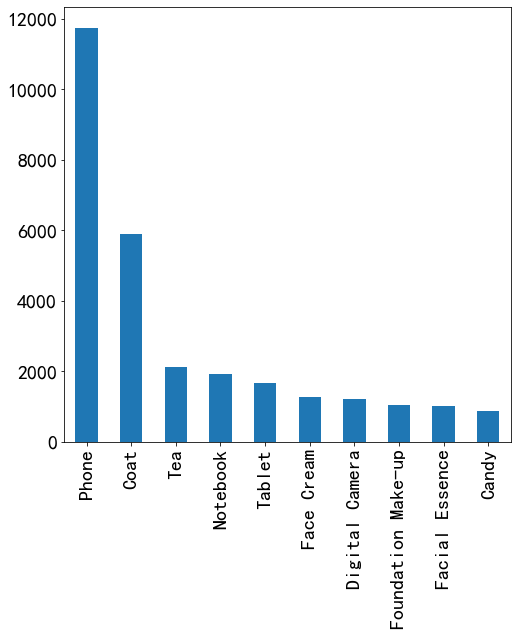

In [32]:
plt.figure(figsize=[8,8])
browse_not_buy_counts.plot.bar()

In [33]:
cart_not_buy_index = JD_labels.cart_not_buy == "是"
cart_not_buy_counts = JD_labels[cart_not_buy_index].cate_most_SavedCart.value_counts().head(10)
cart_not_buy_counts

Phone             28
Coat              24
Notebook           9
Tablet             8
Tea                5
Digital Camera     4
Cookie             4
Football           3
Sport Suit         3
Xbox               3
Name: cate_most_SavedCart, dtype: int64

<AxesSubplot:>

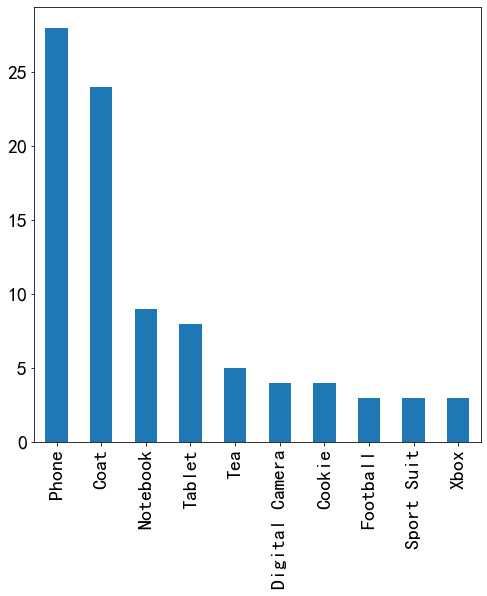

In [34]:
plt.figure(figsize=[8,8])
cart_not_buy_counts.plot.bar()

（4）用户最喜欢在什么时间点浏览购物平台？用户最喜欢在什么时间点购买商品？用户活跃分布图（日、月）

In [35]:
customer_time_browse = JD_labels.time_browse.value_counts().head()#这里我们取出前五个数据
customer_time_browse

晚上    13241
下午    10498
上午     7767
中午     6554
凌晨     3196
Name: time_browse, dtype: int64

<AxesSubplot:>

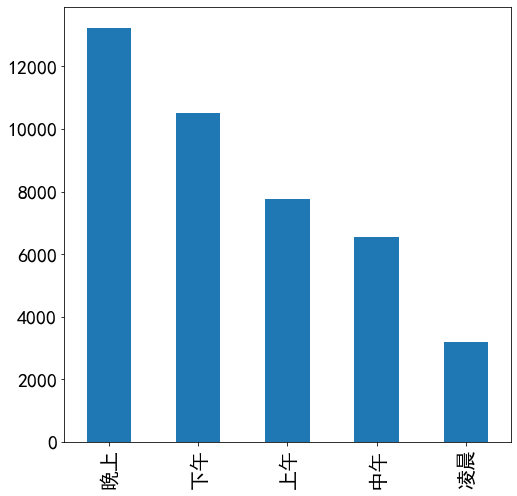

In [36]:
plt.figure(figsize=[8,8])
customer_time_browse.plot.bar()

In [37]:
customer_time_Order = JD_labels.time_Order.value_counts().head(5)
customer_time_Order

晚上    882
下午    869
上午    633
中午    618
凌晨    164
Name: time_Order, dtype: int64

<AxesSubplot:>

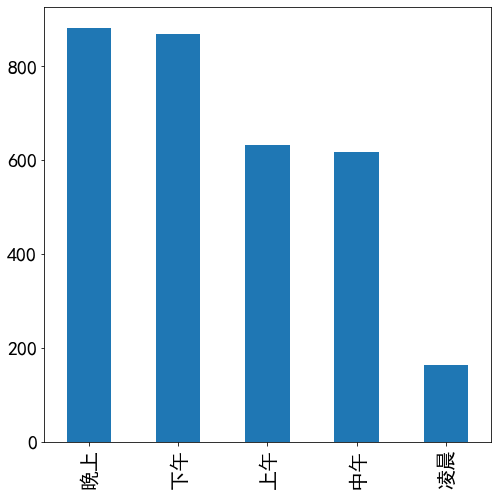

In [38]:
plt.figure(figsize=[8,8])
customer_time_Order.plot.bar()

In [39]:
customer_week_date = JD_labels.week_active.value_counts()
customer_week_date


1.0    18617
2.0      818
3.0      161
4.0       38
5.0       16
6.0        6
9.0        2
7.0        1
Name: week_active, dtype: int64

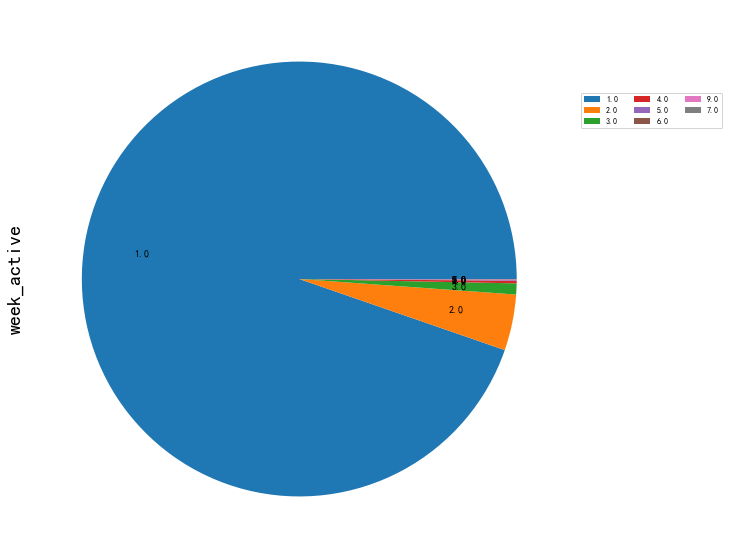

In [40]:
plt.figure(figsize=[10,10])
customer_week_date.plot.pie(labeldistance = 0.7,textprops= {'fontsize' : 10})#数据可视化
plt.rcParams.update({'font.size': 8}) #设置图例字体大小
plt.legend(bbox_to_anchor=(1.01,0.85),ncol = 3)#显示图例

In [41]:
customer_month_date = JD_labels.month_active.value_counts()
customer_month_date


1.0    18617
2.0      818
3.0      161
4.0       38
5.0       16
6.0        6
9.0        2
7.0        1
Name: month_active, dtype: int64

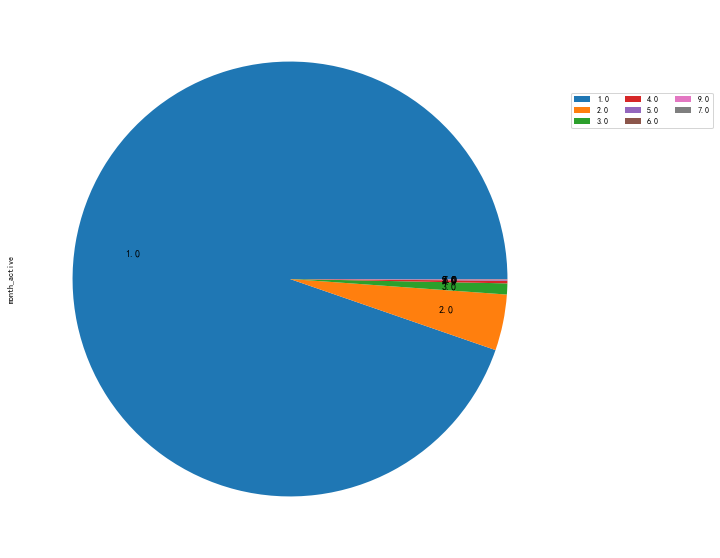

In [42]:
plt.figure(figsize=[10,10])
customer_month_date.plot.pie(labeldistance = 0.7,textprops= {'fontsize' : 10})#数据可视化
plt.rcParams.update({'font.size': 8}) #设置图例字体大小
plt.legend(bbox_to_anchor=(1.01,0.85),ncol = 3)#显示图例

1.通过观察可视化结构，我们可以清楚的看到用户对于电子产品的消费热情很高，平台可以加强这方面的营销以刺激用户消费欲望
2.用户更喜欢在下午和晚上来访问网站建议在此时加强广告的推送和营销可以增加收入
3.可以利用促销活动，限时降价等活动刺激用户消费
4.在换季期间可以加强对衣服的降价打折

4.	针对文件df_shoft所提供数据，预测未来一个星期京东商品的销售数量

In [43]:
order_date = df.date.value_counts().sort_index()
order_date

2018-02-01    1175
2018-02-02    1018
2018-02-03    1151
2018-02-04    1264
2018-02-05    1189
              ... 
2018-04-11     812
2018-04-12     799
2018-04-13     761
2018-04-14     756
2018-04-15     659
Name: date, Length: 74, dtype: int64

<AxesSubplot:xlabel='date'>

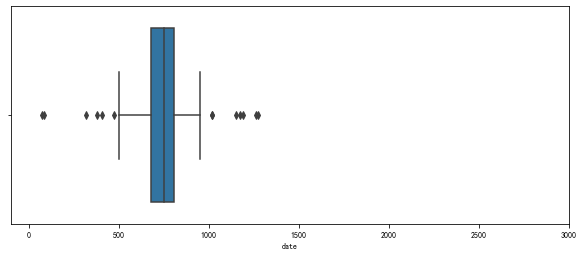

In [44]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=order_date)#查看order_date里是否存在异常值也就是销量是小于零的值


In [45]:
order_date.isnull().sum()#发现没有空值

0

In [46]:
sales =df.groupby("date").describe().unstack()
sales

                   date      
Unnamed: 0  count  2018-02-01    1175.0
                   2018-02-02    1018.0
                   2018-02-03    1151.0
                   2018-02-04    1264.0
                   2018-02-05    1189.0
                                  ...  
type        max    2018-04-11       5.0
                   2018-04-12       5.0
                   2018-04-13       5.0
                   2018-04-14       5.0
                   2018-04-15       5.0
Length: 2368, dtype: float64

In [47]:
model = LinearRegression()#建立线性模型
z = np.array(order_date.keys().astype(int))#由于时间是无法作为变量的于是我们选择一一将时间赋值
for i in range(len(z)):
    z[i] = int(i)
x = z
x = x.reshape(-1,1)#将其分为二维数组
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73]], dtype=int64)

In [48]:
y = np.array(order_date.values.astype(int))#取出对应日期的销量
y

array([1175, 1018, 1151, 1264, 1189, 1274, 1019,  923,  953,  891,  777,
        704,  569,  475,  316,  378,  408,  503,  544,  563,  649,  719,
        782,  819,  731,  810,  849,  776,  789,  718,  786,  840,  727,
        787,  817,  754,  715,  749,  740,  753,  779,  824,  871,  743,
        758,  809,  788,  807,  747,  781,  695,  698,  741,  807,   73,
         83,  725,  680,  680,  650,  620,  663,  563,  614,  730,  655,
        740,  824,  809,  812,  799,  761,  756,  659])

In [49]:
model = LinearRegression().fit(x, y)#将变量带入模型当中
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.10152260058544116


In [50]:
print('intercept:', model.intercept_)#模型的截距
print('slope:', model.coef_)#模型的k

intercept: 857.1286486486486
slope: [-3.06535357]


In [51]:
y_pred = model.predict(x+7)#用模型进行预测
print('predicted response:', y_pred, sep='\n')

predicted response:
[835.67117364 832.60582007 829.54046649 826.47511292 823.40975935
 820.34440578 817.2790522  814.21369863 811.14834506 808.08299148
 805.01763791 801.95228434 798.88693077 795.82157719 792.75622362
 789.69087005 786.62551648 783.5601629  780.49480933 777.42945576
 774.36410218 771.29874861 768.23339504 765.16804147 762.10268789
 759.03733432 755.97198075 752.90662718 749.8412736  746.77592003
 743.71056646 740.64521288 737.57985931 734.51450574 731.44915217
 728.38379859 725.31844502 722.25309145 719.18773787 716.1223843
 713.05703073 709.99167716 706.92632358 703.86097001 700.79561644
 697.73026287 694.66490929 691.59955572 688.53420215 685.46884857
 682.403495   679.33814143 676.27278786 673.20743428 670.14208071
 667.07672714 664.01137357 660.94601999 657.88066642 654.81531285
 651.74995927 648.6846057  645.61925213 642.55389856 639.48854498
 636.42319141 633.35783784 630.29248427 627.22713069 624.16177712
 621.09642355 618.03106997 614.9657164  611.90036283]


630.29248427 627.22713069 624.16177712
621.09642355 618.03106997 614.9657164  611.90036283 最后这七个数据就是预测的未来一周京东商品的销售数量

In [52]:
"%.0f" %(sum([630.29248427,627.22713069,624.16177712,621.09642355,618.03106997,614.9657164,611.90036283]))

'4348'